In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os

In [3]:
random.seed(42)

# Pareto distribution parameters
xm = 100  
alpha = 0.95 

# Number of solvers
n_values = range(2, 201)

# Simulations to average over
num_simulations = 10000

ratios = []
ratios_median = []

for n in n_values:

    second_highest_bids = []
    highest_bids = []
    
    for _ in range(num_simulations):
        bids = np.random.pareto(alpha, n) +  xm  
        sorted_bids = np.sort(bids)
        second_highest_bids.append(sorted_bids[-2])  
        highest_bids.append(sorted_bids[-1])  
    
    # Expected second highest and highest bids
    expected_second_highest = np.mean(second_highest_bids)
    expected_highest = np.mean(highest_bids)
    
    # Median second highest and highest bids
    median_second_highest = np.median(second_highest_bids)
    median_highest = np.median(highest_bids)
    
    # Ratios of expected second highest bids to highest bids
    ratio = expected_second_highest / expected_highest
    ratios.append(ratio)
    
    # Ratios of median second highest bids to highest bids
    ratio_median =median_second_highest/median_highest
    ratios_median.append(ratio_median)

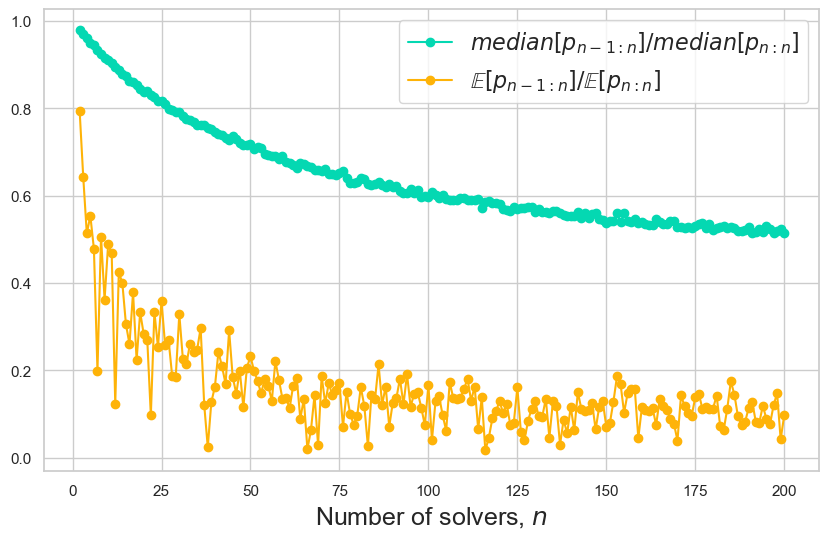

In [4]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
plt.plot(n_values, ratios_median, marker='o', linestyle='-', color='xkcd:aquamarine', label = "$median[p_{n-1:n}]/median[p_{n:n}]$")
plt.plot(n_values, ratios, marker='o', linestyle='-', color='xkcd:amber', label = "$\mathbb{E}[p_{n-1:n}]/\mathbb{E}[p_{n:n}]$")
plt.xlabel('Number of solvers, $n$', fontsize = 18)
plt.ylabel('', fontsize = 18)
plt.grid(True)
plt.legend(fontsize = 16)

figpath="./figs/"
if not(os.path.exists(figpath)): os.makedirs(figpath)
for tag in ['png','pdf']:
    plt.savefig(figpath+'pareto.'+tag, transparent=True, bbox_inches='tight',dpi=500 )
    
plt.show()